In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df = pd.read_csv('datasets_331993_662385_accident_UK.csv')
df.head()
#df.tail()

,Date,Total_Accident
1456,27/12/2017,264
1457,28/12/2017,296
1458,29/12/2017,240
1459,30/12/2017,210
1460,31/12/2017,188


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1461 non-null   object
 1   Total_Accident  1461 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.0+ KB


**Convert the Date coloumn to Date type** 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Total_Accident
0,2014-01-01,267
1,2014-02-01,328
2,2014-03-01,308
3,2014-04-01,272
4,2014-05-01,269


**Sorting the data by Date**

In [ ]:
df = df.sort_values(by=['Date'])
df.head(5)

,Date,Total_Accident
0,2014-01-01,267
31,2014-01-02,409
59,2014-01-03,392
90,2014-01-04,432
120,2014-01-05,434


**Set the Date for index**

In [ ]:
accident = df.set_index('Date')
accident.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

**Extract the average number of accidents in each month**

In [ ]:
y = accident['Total_Accident'].resample('MS').mean()
y.head()

Date
2014-01-01    413.870968
2014-02-01    376.607143
2014-03-01    390.193548
2014-04-01    386.166667
2014-05-01    398.967742
Freq: MS, Name: Total_Accident, dtype: float64

**Visualize average number of accidents in each month**

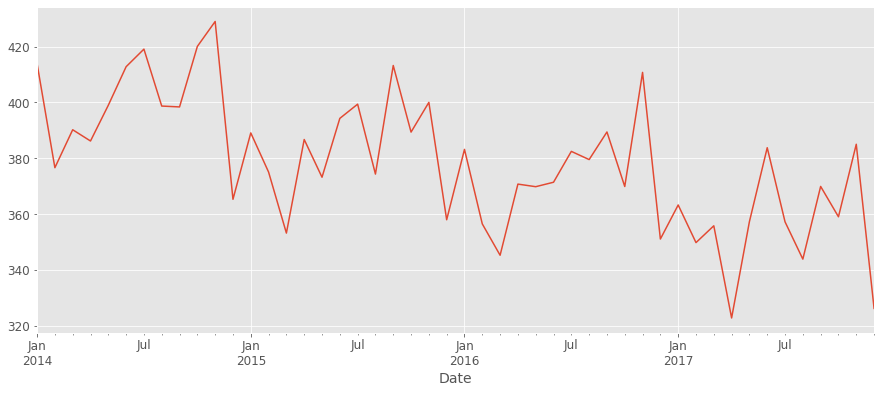

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

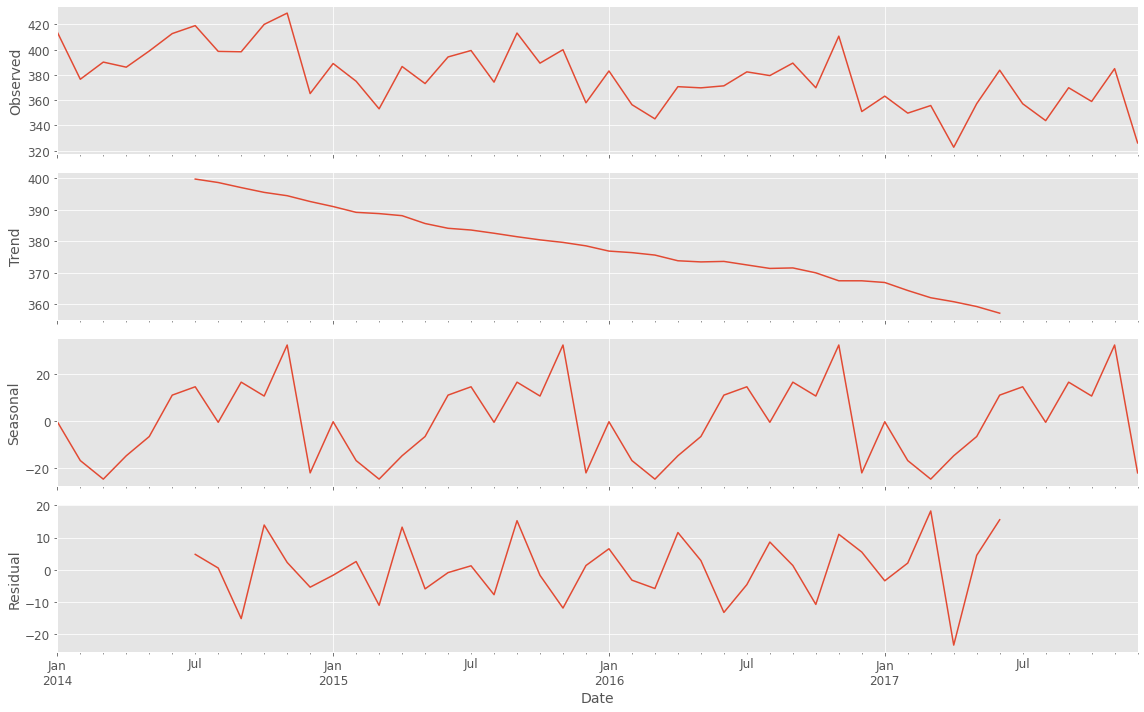

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

**Different parameter combinations for seasonal ARIMA**

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Different parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Different parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**In this step, parameter selection for ARIMA Time Series Model is done.Our goal is to find the optimal set of parameters that yields the best performance for our model**

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:693.3835840545718
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1665.084238497068
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:313.23098038846587
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:297.4422616229526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:283.66897502744746
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:213.49519939869833
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:626.2291482687816
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2714.399272167869
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:304.0445326141413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:300.68561805750966
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:271.4050539335089
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:212.9852013230672
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:431.14530785567564
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1469.210022123732
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:313.58231450199077
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:317.6444439735482
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1419.08611388798
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:209.01804141911435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:406.5139005052198
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1356.949639608919
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:276.56784630867867
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:292.70437020684585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1362.5824643268231
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:193.4042032363045
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:443.0564189638234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1707.614760923458
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:310.8120010228951
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:288.3494052067912
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:281.1610017586637
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:205.8150402462062
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:411.88160101800105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1479.2410323526674
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:287.9454066495947
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:287.61741304775336
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:273.2415632030857
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:197.06150234568284
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:417.1136343896899
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1465.3622965319921
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:305.71594871533216
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:300.33573967108623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1400.9688121419922
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:198.58139453930232
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:408.2968598086789


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1453.5180638309293
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:276.155872759618
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:284.4845273205662
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1391.9987425436643
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:186.26610292908924


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**Fitting the ARIMA model**

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2631      0.330     -0.797      0.426      -0.910       0.384
ma.L1         -1.0000   3079.658     -0.000      1.000   -6037.019    6035.019
ar.S.L12      -0.5254      0.327     -1.606      0.108      -1.167       0.116
sigma2       171.1015   5.27e+05      0.000      1.000   -1.03e+06    1.03e+06


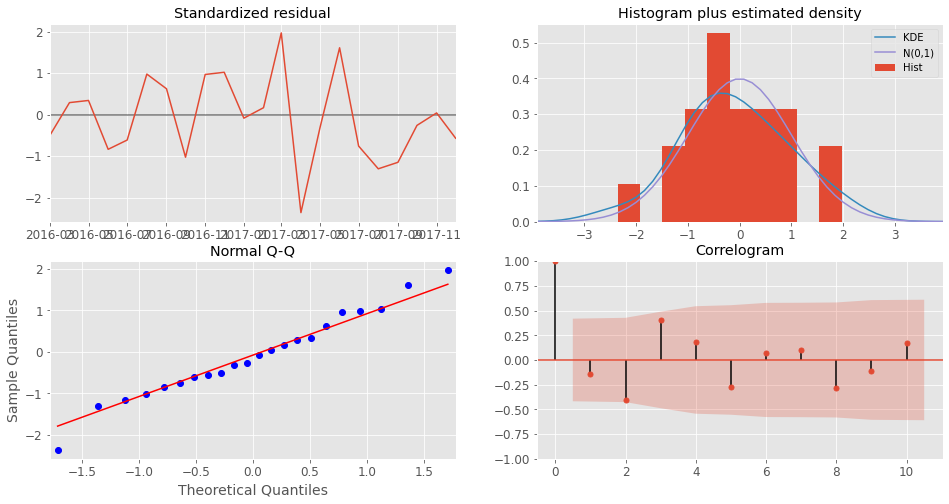

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Evaluation of Forecasts**

To understand the accuracy of the forecasts, predicted no of accidents is compared to real no of time series, the forecast is set to start from 2017-01-01 to end of date.

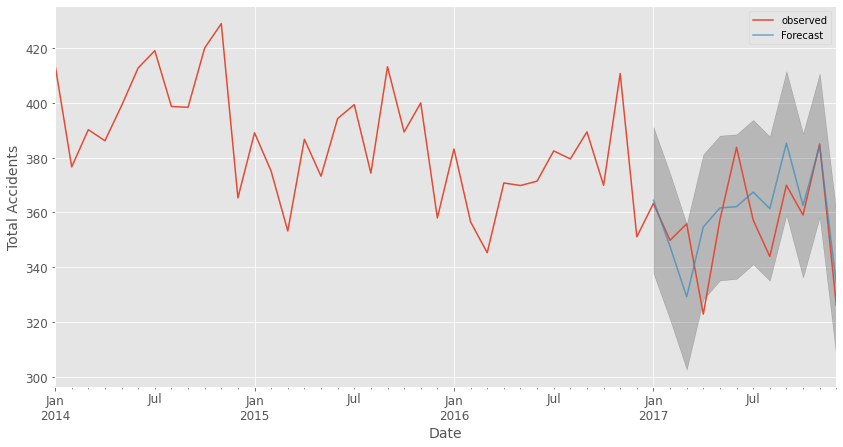

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Accidents')
plt.legend()
plt.show()

**Checking the accuracy of the model using MSE** 
MSE is the average of the square of the difference between the observed and pridicted values.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 244.7


**Visualising Forecasts**

We can observe from the graph the number of road accidents in UK will be declined in next years

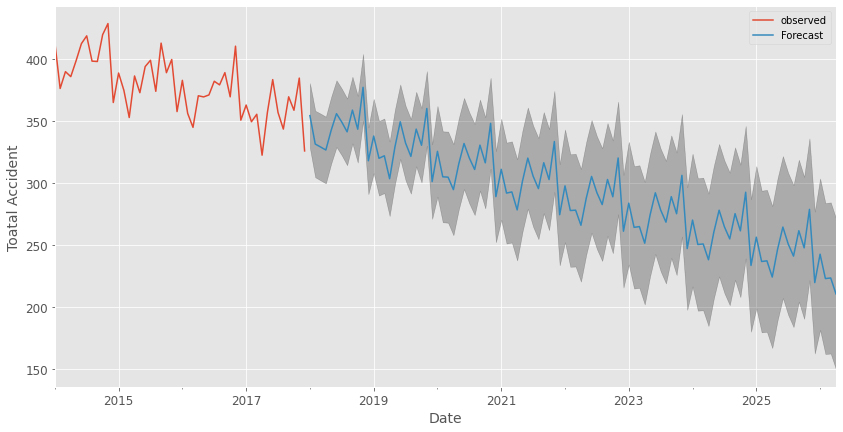

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Toatal Accident')
plt.legend()
plt.show()

**Applying Prophet**

Sort the values by Date

In [ ]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2014-01-01,267
31,2014-01-02,409
59,2014-01-03,392
90,2014-01-04,432
120,2014-01-05,434


Since Prophet requires the variable names in time series to be 


*   y- Target
*   ds- Datetime



In [ ]:
df = df.rename(columns={'Date': 'ds',
                        'Total_Accident': 'y'})
df.head()

,ds,y
0,2014-01-01,267
31,2014-01-02,409
59,2014-01-03,392
90,2014-01-04,432
120,2014-01-05,434


**Visualising the number of road accident for each day**

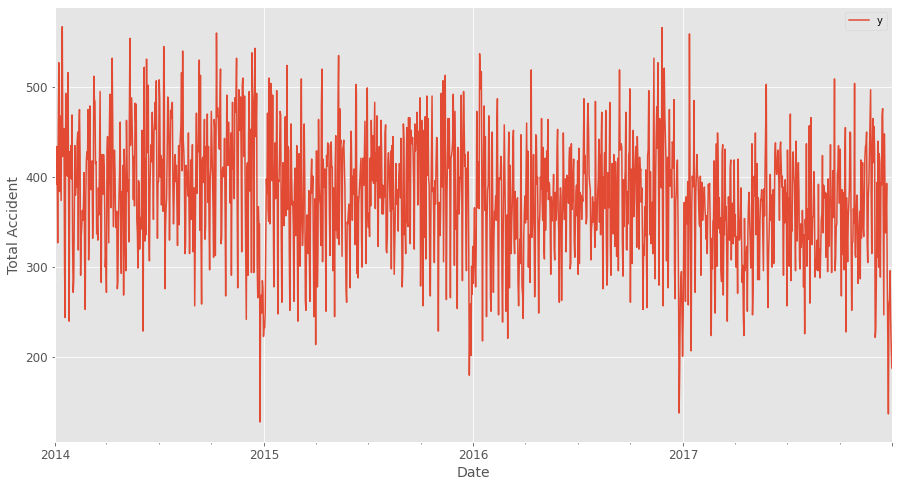

In [ ]:
ax = df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Total Accident')
ax.set_xlabel('Date')

plt.show()

**Fitting the Prophet model**

Setting the uncertainity interval to 95%(the Prophet default is 80%)

In [ ]:
from fbprophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


To create forecast with our model we need some futre dates.
Prphet provides make_future_dataframe to do so. Input the no of future periods and frequency. Created for 36 months/3 years.

In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1492,2020-08-01
1493,2020-09-01
1494,2020-10-01
1495,2020-11-01
1496,2020-12-01


yhat is forecast value

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1492,2020-08-01,293.442937,184.104231,395.311917
1493,2020-09-01,321.348831,204.812737,432.990557
1494,2020-10-01,347.881230,242.786883,457.144649
1495,2020-11-01,264.853399,155.295335,373.527282
1496,2020-12-01,365.548492,250.789629,469.814144


**Graph of actuals and forecast**

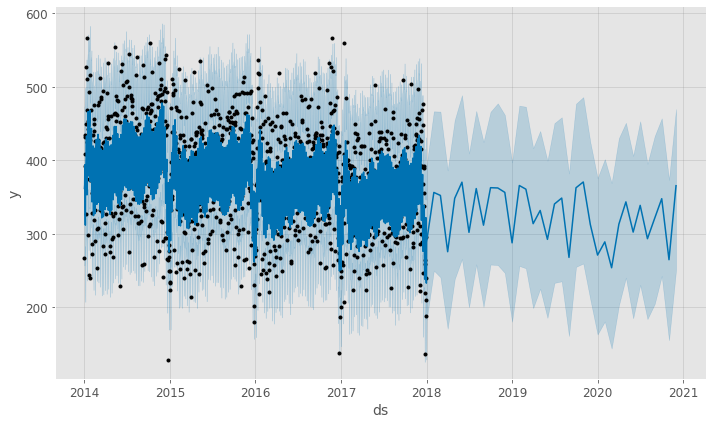

<Figure size 720x576 with 0 Axes>

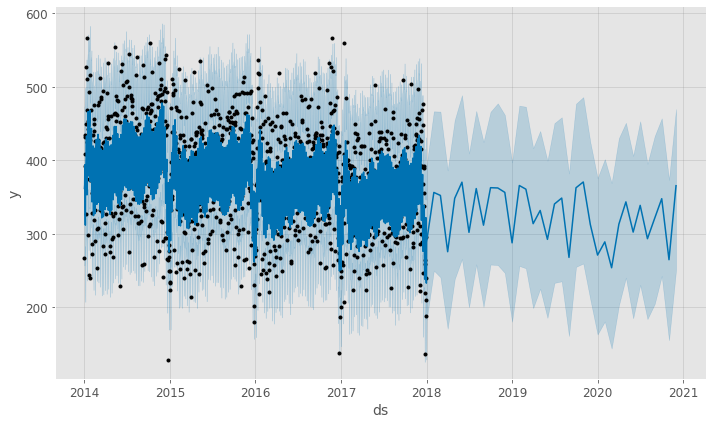

In [ ]:
plt.figure(figsize=(10,8))
my_model.plot(forecast,
              uncertainty=True)

**plot_components provides a graph of Trend and Seasonality**

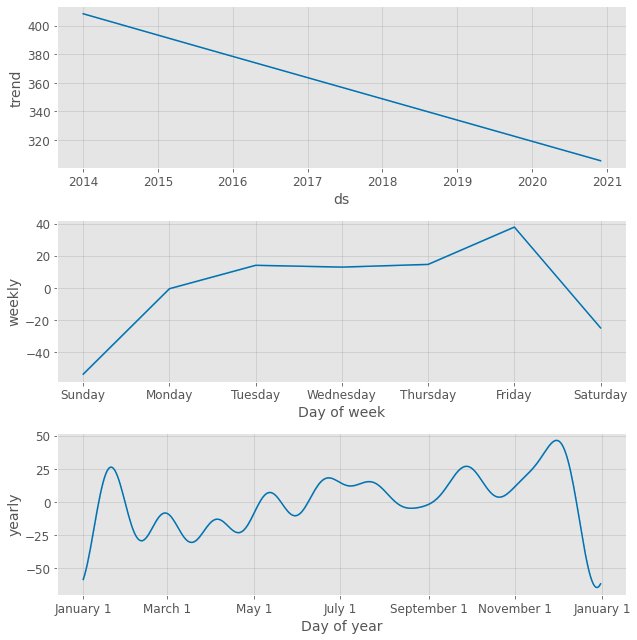

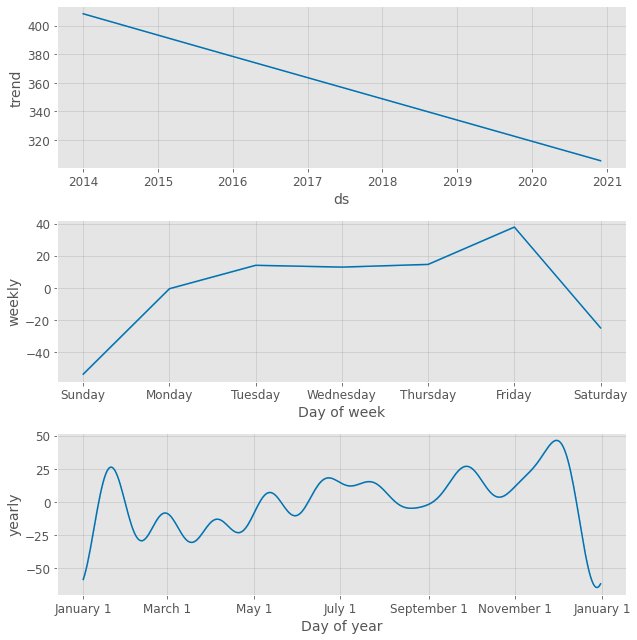

In [ ]:
my_model.plot_components(forecast)

**Model Evaluation** 

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-06 00:00:00 and 2016-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-07,343.739804,233.263572,458.667148,473,2016-01-06
1,2016-01-08,377.275100,271.094406,488.971209,369,2016-01-06
2,2016-01-09,322.464915,210.783727,440.103816,366,2016-01-06
3,2016-01-10,292.516112,177.134015,408.059109,417,2016-01-06
4,2016-01-11,360.615271,250.353411,473.739377,365,2016-01-06


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,3524.699659,59.369181,45.000897,0.122222,0.082391,0.923547
1,38 days,3506.336307,59.214325,45.172041,0.122663,0.099446,0.926606
2,39 days,3536.684037,59.470026,45.478772,0.123442,0.099446,0.926606
3,40 days,3445.099822,58.694973,44.825283,0.121743,0.099446,0.932722
4,41 days,3377.346701,58.114944,44.535373,0.120791,0.103504,0.935780
